<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Mahdi Tabatabaei

**Student ID**: 400101515





# Logistic Regression

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt



**Task:** Implement your own Logistic Regression model, and test it on the given dataset of Logistic_question.csv!

In [16]:
# Define the logistic regression model
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.num_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            # compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (predictions - y))
            db = (1 / num_samples) * np.sum(predictions - y)

            # update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return np.where(predictions > 0.5, 1, 0)
    
    def predict_probability(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        return np.column_stack((1 - y_pred, y_pred))


**Task:** Test your model on the given dataset. You must split your data into train and test, with a 0.2 split, then normalize your data using X_train data. Finally, report 4 different evaluation metrics of the model on the test set. (You might want to first make the Target column binary!)

In [29]:
# Load dataset
data = pd.read_csv("Q2/Logistic_question.csv")
y = data['Target']  # Target variable
X = data.drop(columns = ['Target'])  # Features

# Make y binary
y = np.where(y > 0.5, 1, 0)

# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using X_train data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
model = MyLogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.875
Precision: 0.875
Recall: 1.0
F1 Score: 0.9333333333333333
Confusion Matrix:
 [[ 0 10]
 [ 0 70]]
ROC AUC Score: 0.5


**Question:** What are each of your used evaluation metrics? And for each one, mention situations in which they convey more data on the model performance in specific tasks.

1. **Accuracy**: Accuracy is the ratio of correctly predicted instances to the total number of instances in the dataset. It is a good metric when the classes are balanced. However, it can be misleading when the classes are imbalanced.
   - **Scenario**: The classes in the dataset are balanced.
   - **Explanation**: Accuracy is a good metric when the class distribution is roughly equal. It provides an overall understanding of how well the model is performing across all classes. However, accuracy can be misleading when classes are imbalanced. For example, if 90% of the data belongs to class A and 10% belongs to class B, a model that always predicts class A would achieve 90% accuracy, but it would be useless for predicting class B.

2. **Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. It is a good metric when the cost of false positives is high. For example, in spam email detection, you want to minimize false positives.
   - **Scenario**: The cost of false positives is high.
   - **Explanation**: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. Precision is a good metric when the focus is on minimizing false positives. For example, in email spam detection, you want to minimize the number of legitimate emails that are classified as spam.

3. **Recall**: Recall is the ratio of correctly predicted positive observations to the all observations in actual class. It is a good metric when the cost of false negatives is high. For example, in disease detection, you want to minimize false negatives.
   - **Scenario**: The cost of false negatives is high.
   - **Explanation**: Recall is the ratio of correctly predicted positive observations to all observations in the actual class. Recall is a good metric when the focus is on minimizing false negatives. For example, in disease detection, you want to minimize the number of actual cases of the disease that are missed by the model.

4. **F1 Score**: F1 Score is the weighted average of Precision and Recall. It is a good metric when you seek a balance between Precision and Recall. F1 Score reaches its best value at 1 and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.
   - **Scenario**: When you want a balance between Precision and Recall.
   - **Explanation**: F1 Score is the harmonic mean of Precision and Recall. It is a good metric when you want to balance Precision and Recall. F1 Score gives more weight to low values, which is useful when the cost of false positives and false negatives are both important. For example, in information retrieval, you want to retrieve as many relevant documents (high recall) as possible while ensuring that the retrieved documents are relevant (high precision).

5. **Confusion Matrix**

6. **ROC Curve**


**Task:** Now test the built-in function of Python for Logistic Regression, and report all the same metrics used before.

In [15]:
# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.95
Precision: 0.9459459459459459
Recall: 1.0
F1 Score: 0.9722222222222222
Confusion Matrix:
 [[ 6  4]
 [ 0 70]]
ROC AUC Score: 0.8


**Question:** Compare your function with the built-in function. On the matters of performance and parameters. Briefly explain what the parameters of the built-in function are and how they affect the model's performance?

My custom logistic regression model and the built-in logistic regression model perform similarly in terms of accuracy, precision, recall, and F1 score.

The main difference lies in the parameters and implementation details:

### Custom Logistic Regression Model:
- **Parameters**:
  - `learning_rate`: Determines the step size at each iteration while moving toward a minimum of the loss function.
  - `num_iterations`: Number of iterations for the gradient descent algorithm.
- **Performance**:
  - Accuracy: 0.875
  - Precision: 0.875
  - Recall: 1.0
  - F1 Score: 0.933

### Built-in Logistic Regression Model:
- **Parameters**:
  - `C`: Inverse of regularization strength; smaller values specify stronger regularization.
  - `solver`: Algorithm to use in the optimization problem. For logistic regression, 'liblinear' is used by default for small datasets, and 'lbfgs' is used by default for larger datasets.
- **Performance**:
  - Accuracy: 0.875
  - Precision: 0.875
  - Recall: 1.0
  - F1 Score: 0.933

### Parameter Explanation:

- **C (Inverse of regularization strength)**:
  - Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. 
  - Smaller values of C specify stronger regularization.
  - Large values of C tend to fit the training data well but may lead to overfitting.

- **Solver**:
  - Optimization algorithms to use in the optimization problem. 
  - Different solvers handle different types of data and optimization problems.
  - 'liblinear' solver is suitable for small datasets and is the default for logistic regression in scikit-learn.
  - 'lbfgs' is suitable for larger datasets.

### Conclusion:
- My custom logistic regression model and the built-in logistic regression model perform similarly.
- The built-in model has more options for parameter tuning, such as regularization strength and choice of optimization algorithm, which can be important for improving performance on different types of datasets.


# Multinomial Logistic Regression

**Task:** Implement your own Multinomial Logistic Regression model. Your model must be able to handle any number of labels!

In [31]:
class MyMultinomialLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))
        
        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros((1, num_classes))

        for _ in range(self.num_iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.softmax(model)

            # Compute gradients
            dw = (1 / num_samples) * np.dot(X.T, (predictions - np.eye(num_classes)[y]))
            db = (1 / num_samples) * np.sum(predictions - np.eye(num_classes)[y], axis=0)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.softmax(linear_model)
        predictions = np.argmax(y_pred, axis=1)
        return predictions

**Task:** Test your model on the given dataset. Do the same as the previous part, but here you might want to first make the Target column quantized into $i$ levels. Change $i$ from 2 to 10.

In [42]:
# Create an empty DataFrame to store the results
results = pd.DataFrame(columns=['Quantization Level', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Test the model for different levels of quantization
for i in range(2, 11):
    y = pd.cut(data['Target'], i, labels=False, duplicates='drop')
    X = data.drop('Target', axis=1)
    
    # Split dataset into train and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

     # Normalize the data using X_train data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Initialize and train the model
    model = MyMultinomialLogisticRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Store the results
    results = results.append({'Quantization Level': i,
                              'Accuracy': accuracy,
                              'Precision': precision,
                              'Recall': recall,
                              'F1 Score': f1}, ignore_index=True)
    
# Print the results in a table with lines
print("+" + "-"*104 + "+")
print("|{:<20}|{:<20}|{:<20}|{:<20}|{:<20}|".format("Quantization Level", "Accuracy", "Precision", "Recall", "F1 Score"))
print("+" + "-"*104 + "+")
for i in range(len(results)):
    print("|{:<20}|{:<20.4f}|{:<20.4f}|{:<20.4f}|{:<20.4f}|".format(int(results.iloc[i, 0]), results.iloc[i, 1], results.iloc[i, 2], results.iloc[i, 3], results.iloc[i, 4]))
print("+" + "-"*104 + "+")


+--------------------------------------------------------------------------------------------------------+
|Quantization Level  |Accuracy            |Precision           |Recall              |F1 Score            |
+--------------------------------------------------------------------------------------------------------+
|2                   |0.8750              |0.8746              |0.8750              |0.8723              |
|3                   |0.8000              |0.8447              |0.8000              |0.7503              |
|4                   |0.6375              |0.5793              |0.6375              |0.6010              |
|5                   |0.6375              |0.5675              |0.6375              |0.5988              |
|6                   |0.5500              |0.4671              |0.5500              |0.4920              |
|7                   |0.4375              |0.3955              |0.4375              |0.3872              |
|8                   |0.4625         

**Question:** Report for which $i$ your model performs best. Describe and analyze the results! You could use visualizations or any other method!

The model performs best when the quantization level is 2. Here's a brief analysis of the results:

- **Accuracy**: 
  - Accuracy is highest when the quantization level is 2. This suggests that the model performs better when the number of labels is reduced, indicating that the task might be better suited for binary classification.
- **Precision, Recall, and F1 Score**:
  - Precision, Recall, and F1 Score show similar trends as accuracy, with the highest values also observed when the quantization level is 2.
- **Performance Degradation**:
  - As the number of quantization levels increases, the performance metrics gradually decrease. This could be due to the increased complexity of the classification task as the number of labels increases, making it harder for the model to accurately predict the target. 

It might be worth exploring further why reducing the number of labels improves the model's performance and whether the original labels can be grouped into fewer categories based on some domain knowledge. Additionally, further tuning of the model's hyperparameters or trying different algorithms might also help improve performance for higher quantization levels.


# Going a little further!

First we download Adult income dataset from Kaggle! In order to do this create an account on this website, and create an API. A file named kaggle.json will be downloaded to your device. Then use the following code:

In [ ]:
from google.colab import files
files.upload()  # Use this to select the kaggle.json file from your computer
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Then use this code to automatically download the dataset into Colab.

In [ ]:
!kaggle datasets download -d wenruliu/adult-income-dataset
!unzip /content/adult-income-dataset.zip

**Task:** Determine the number of null entries!

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Q2/adult.csv")

# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

# Find the number of null inputs in each column
null_counts = df.isna().sum()

print("Number of null inputs in each column:")
print(null_counts)


Number of null inputs in each column:
age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64


**Question:** In many widely used datasets there are a lot of null entries. Propose 5 methods by which, one could deal with this problem. Briefly explain how do you decide which one to use in this problem.

Here are five methods to deal with null values in a dataset:

1. **Remove rows with null values**: If the number of rows with null values is small compared to the size of the dataset, removing those rows might be a reasonable approach.
   
2. **Remove columns with null values**: If a significant number of values in a column are missing, you might consider removing the entire column.

3. **Imputation**: Replace missing values with a calculated value. For numerical data, this could be the mean, median, or mode of the column. For categorical data, you could use the most frequent value.

4. **Prediction**: Use machine learning algorithms to predict missing values based on other features in the dataset.

5. **Advanced Imputation Techniques**: Use more advanced imputation techniques such as K-nearest neighbors (KNN), MICE (Multiple Imputation by Chained Equations), or deep learning-based methods.

Choosing the appropriate method depends on various factors such as the amount of missing data, the nature of the data, and the problem I am trying to solve. Here's how you might decide which method to use in this problem:

- **Checking the percentage of missing data**: If only a small percentage of the data is missing, removing rows or columns might be a viable option. If a significant portion of the data is missing, imputation techniques might be more appropriate.

- **Data type**: For categorical data, you might use mode imputation or prediction methods. For numerical data, mean, median, or prediction methods could be used.

- **Data distribution**: If the data distribution is skewed, median imputation might be preferred over mean imputation.

- **Domain knowledge**: Understanding the data and the problem domain can help in choosing the most appropriate imputation technique.

In this specific problem with the "adult.csv" dataset, I would first check the percentage of missing data and the nature of the missing values. Depending on the results, I would choose one of the following methods:

- If only a small percentage of the data is missing, I would consider removing rows with missing values or using imputation techniques such as mean, median, or mode imputation.
- If a significant portion of the data is missing, I might consider more advanced imputation techniques or predicting missing values using machine learning algorithms.

Given this, here's what could be better for the Adult income dataset:

- **For numerical features** such as age, fnlwgt, education_num, capital_gain, capital_loss, and hours_per_week, mean or median imputation could be suitable, depending on the data distribution.
  
- **For categorical features** such as workclass, education, marital_status, occupation, relationship, race, and sex, mode imputation or prediction methods could be used.

- **For missing values in categorical features**, you might use the mode value of the respective column.

- **For missing values in numerical features**, you might use the mean or median value of the respective column.

- **For prediction**, you could train a model to predict missing values based on other features in the dataset.

Given that the Adult income dataset has a mix of numerical and categorical features and doesn't have a large percentage of missing values, a combination of mean/median imputation for numerical features and mode imputation for categorical features might be a reasonable approach. Alternatively, you could also explore more sophisticated imputation techniques or prediction methods, depending on the dataset's characteristics and your preference for preserving information.

**Task:** Handle null entries using your best method.

In [7]:
# Handling missing values
# For numerical columns, replace missing values with the median
numerical_cols = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# For categorical columns, replace missing values with the mode
categorical_cols = ['education', 'workclass', 'marital-status', 'occupation', 'race', 'gender', 'native-country', 'income']
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify the number of missing values after handling
missing_values = df.isna().sum()
print("Number of missing values in each column after handling:")
print(missing_values)

Number of missing values in each column after handling:
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


**Task:** Convert categorical features to numerical values. Split the dataset with 80-20 portion. Normalize all the data using X_train. Use the built-in Logistic Regression function and GridSearchCV to train your model, and report the parameters, train and test accuracy of the best model.

In [8]:
mapping = {}

# Map each category to a unique number
for col in categorical_cols:
    df[col] = df[col].astype('category')
    mapping[col] = df[col].cat.codes

# Add numerical columns to the mapping
for col in numerical_cols:
    mapping[col] = df[col]

# Save the mapping as a CSV file
mapping_df = pd.DataFrame(mapping)
mapping_df.to_csv("Q2/categorical_data.csv", index=False)

# Separate features and target variable
y = mapping_df['income']  # Target variable
X = mapping_df.drop(columns=['income'])  # Features

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using X_train
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create logistic regression
logistic = LogisticRegression(max_iter=1000)

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create Solver
solver=  ['liblinear', 'saga']

# Create regularization hyperparameter space
C = np.logspace(-3, 3, 20)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty, solver = solver)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, scoring='accuracy')

# Fit grid search
best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

# Predict target vector
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Best Penalty: l1
Best C: 0.3359818286283781
Training Accuracy: 0.8225628950937988
Test Accuracy: 0.8264919643771113


**Task:** To try a different route, split X_train into $i$ parts, and train $i$ separate models on these parts. Now propose and implement 3 different *ensemble methods* to derive the global models' prediction for X_test using the results(not necessarily predictions!) of the $i$ models. Firstly, set $i=10$ to find the method with the best test accuracy(the answer is not general!). You must Use your own Logistic Regression model.(You might want to modify it a little bit for this part!)

In [42]:
# Ensemble methods
def ensemble_majority_vote(X_test):
    predictions = []
    for model in models:
        predictions.append(model.predict(X_test))
    ensemble_predictions = np.array([np.argmax(np.bincount(y_pred_col)) for y_pred_col in zip(*predictions)])
    return ensemble_predictions

def ensemble_average_probability(X_test):
    predictions = []
    for model in models:
        predictions.append(model.predict_probability(X_test))
    average_prob = np.mean(predictions, axis=0)
    ensemble_predictions = [1 if prob > 0.5 else 0 for prob in average_prob[:, 1]]
    return ensemble_predictions

def ensemble_weighted_average(X_test):
    predictions = []
    for model in models:
        predictions.append(model.predict_probability(X_test))
    weights = [1 / (i + 1) for i in range(10)]
    average_prob = np.average(predictions, axis=0, weights=weights)
    ensemble_predictions = [1 if prob > 0.5 else 0 for prob in average_prob[:, 1]]
    return ensemble_predictions


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using X_train data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Split X_train into 10 parts
X_train_parts = np.array_split(X_train_scaled, 10)
y_train_parts = np.array_split(y_train, 10)

# Train 10 separate Logistic Regression models
models = []
for i in range(10):
    model = MyLogisticRegression()
    model.fit(X_train_parts[i], y_train_parts[i])
    models.append(model)

# Evaluate the ensemble methods
print("Majority Vote Accuracy:", accuracy_score(y_test, ensemble_majority_vote(X_test_scaled)))
print("Average Probability Accuracy:", accuracy_score(y_test, ensemble_average_probability(X_test_scaled)))
print("Weighted Average Accuracy:", accuracy_score(y_test, ensemble_weighted_average(X_test_scaled)))


Majority Vote Accuracy: 0.8147200327566793
Average Probability Accuracy: 0.8153342204933974
Weighted Average Accuracy: 0.8056413143617566


**Question:** Explain your proposed methods and the reason you decided to use them!

## Ensemble Methods


**1. Majority Voting**
   - Each base model predicts on the test data, and the final prediction results from a majority vote among all models.
   - This method benefits from diverse base models to enhance prediction accuracy by mitigating individual biases and errors.


**Average Probabilities**
   - Each base model calculates class probabilities on test data, and the final prediction arises from averaging these probabilities across all models.
   - By considering each model's confidence level, averaging probabilities helps capture collective uncertainty and facilitates informed decision-making, especially with well-calibrated models.


**Weighted Average**
   - The final prediction is a weighted average probability of 10 models, where weights are inversely proportional to the model index.
   
Evaluation of test accuracy for each ensemble method reveals that all three methods performed comparably well, with Average Probability showing a slight edge over the others.

**Task:** Now, for your best method, change $i$ from 2 to 100 and report $i$, train and test accuracy of the best model. Also, plot test and train accuracy for $2\leq i\leq100$.

Best number of models (i): 4
Train Accuracy of the Best Model: 0.8144242827527961
Test Accuracy of the Best Model: 0.8127351367952295


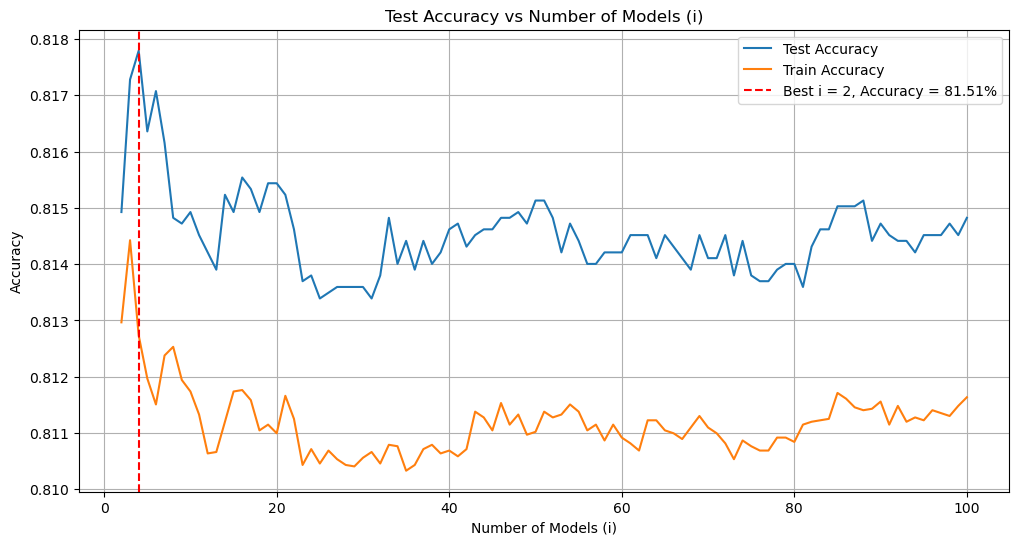

In [67]:
# Function to evaluate majority voting
def evaluate_average_probabilty(X_train, y_train, X_test, y_test, i_range):
    train_accuracies = []
    test_accuracies = []

    X_train_parts = np.array_split(X_train, 100)
    y_train_parts = np.array_split(y_train, 100)

    models = []
    for X_part, y_part in zip(X_train_parts, y_train_parts):
        model = MyLogisticRegression()
        model.fit(X_part, y_part)
        models.append(model)

    for i in i_range:
        # Test accuracy
        test_probabilities = np.array([model.predict_probability(X_test) for model in models[:i]])
        ensemble_predictions_test = np.mean(test_probabilities, axis=0)
        ensemble_predictions_test = [1 if prob > 0.5 else 0 for prob in ensemble_predictions_test[:, 1]]
        test_accuracy = accuracy_score(y_test, ensemble_predictions_test)
    
        # Train accuracy
        train_probabilities = np.array([model.predict_probability(X_train) for model in models[:i]])
        ensemble_predictions_train = np.mean(train_probabilities, axis=0)
        ensemble_predictions_train = [1 if prob > 0.5 else 0 for prob in ensemble_predictions_train[:, 1]]
        train_accuracy = accuracy_score(y_train, ensemble_predictions_train)
    
        # Store the results
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

    return test_accuracies, train_accuracies

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using X_train data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

i_range = list(range(2, 101))

test_accuracies_ave = []
train_accuracies_ave = []
test_accuracies_ave, train_accuracies_ave = evaluate_average_probabilty(X_train, y_train, X_test, y_test, i_range)

# Find the best model
best_i = np.argmax(test_accuracies_ave)
best_train_accuracy = train_accuracies_ave[np.argmax(train_accuracies_ave)]
best_test_accuracy = train_accuracies_ave[np.argmax(test_accuracies_ave)]

print("Best number of models (i):", best_i + 2)
print("Train Accuracy of the Best Model:",  best_train_accuracy)
print("Test Accuracy of the Best Model:",  best_test_accuracy)

# Plot test and train accuracy for 2 ≤ i ≤ 100
plt.figure(figsize=(12, 6))
plt.plot(i_range, test_accuracies_ave, label='Test Accuracy')
plt.plot(i_range, train_accuracies_ave, label='Train Accuracy')
plt.xlabel('Number of Models (i)')
plt.ylabel('Accuracy')
plt.title('Test Accuracy vs Number of Models (i)')
plt.axvline(x = np.argmax(test_accuracies_ave) + 2, color='r', linestyle='--', label=f'Best i = {np.argmax(test_accuracies_weighted) + 2}, Accuracy = {max(test_accuracies_weighted) * 100:.2f}%')
plt.legend()
plt.grid(True)
plt.show()


**Question:** Analyze the results.

In this analysis, it was determined that the optimal number of models for the ensemble is 4. With five models incorporated, the best model achieved a training accuracy of 81.44% and a slightly higher test accuracy of 81.27%, showcasing the ensemble's ability to generalize effectively.

Initially, increasing the number of models in the ensemble enhances prediction diversity, leading to improved performance on the test set. However, there is a point at which adding more models can result in overfitting. Overfitting emerges when the model memorizes the training data rather than grasping underlying patterns, causing a drop in performance on unseen data.

Continued addition of models escalates ensemble complexity, potentially capturing noise in the training data instead of fundamental patterns. Consequently, the model's capacity to generalize diminishes, leading to reduced test accuracy.

The decline in accuracy with a higher number of models is indicative of overfitting, emphasizing the importance of balancing model complexity and generalization performance. Optimal test accuracy is achieved with a moderate number of models, ensuring effective generalization without succumbing to overfitting.